In [181]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [182]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 3
simulator.delta_d_max = 0.15
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.DYNAMIC_FEW_OUTPUT
simulator.data_model_type = ModelType.DYNAMIC_FEW_OUTPUT
simulator.t_sim = 5
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.3, 0.0, 0.0])
simulator.cur = 1/0.3
simulator.track_fun_name = 'oval_track'

simulator.t_data = 10.0
simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    SafetyFilterTypes.INDIRECT_FIX_MU,
    SafetyFilterTypes.INDIRECT_ZERO_V,
    # SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_ZERO_V: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_STOP: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        ], 
    SafetyFilterTypes.INDIRECT_ZERO_V: [ 
        {'lam_sig': 50000, 'L': 300, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
        ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [SimulationInputRule.MAX_THROTTLE]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/LATI.py:138: UserWarning: System not observable!
  warn("System not observable!")
/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/ErrorKinematicAcceLATI.py:154: UserWarning: mu is not in [-pi/2, pi/2]
  warn('mu is not in [-pi/2, pi/2]')


vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE
Fited steady state input: [ 0.         -0.00145376]
Fited steady state output: [ 0.        -0.0220311  0.       ]
Fited steady state input: [0.         0.29593587]
Fited steady state output: [ 0.         -0.17341181  0.        ]
Fited steady state input: [ 0.         -0.00145376]
Fited steady state output: [ 0.        -0.0220311  0.       ]
Fited steady state input: [0.         0.29593587]
Fited steady state output: [ 0.         -0.17341181  0.        ]
Fited steady state input: [ 0.         -0.00145376]
Fited steady stat

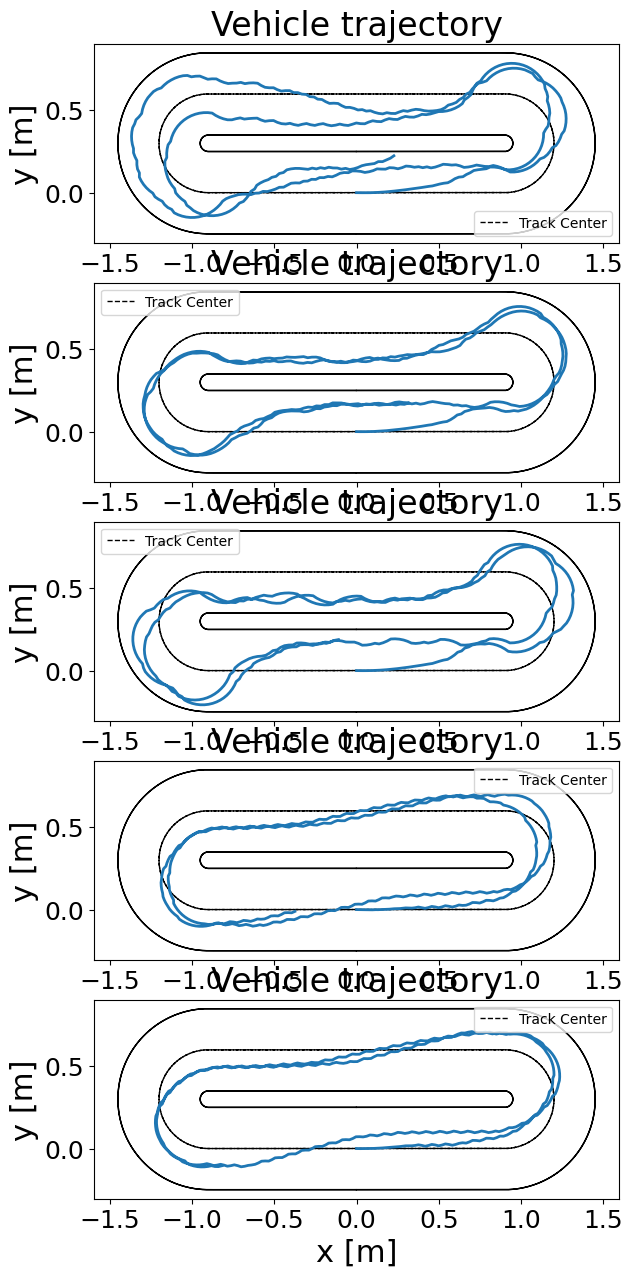

In [183]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

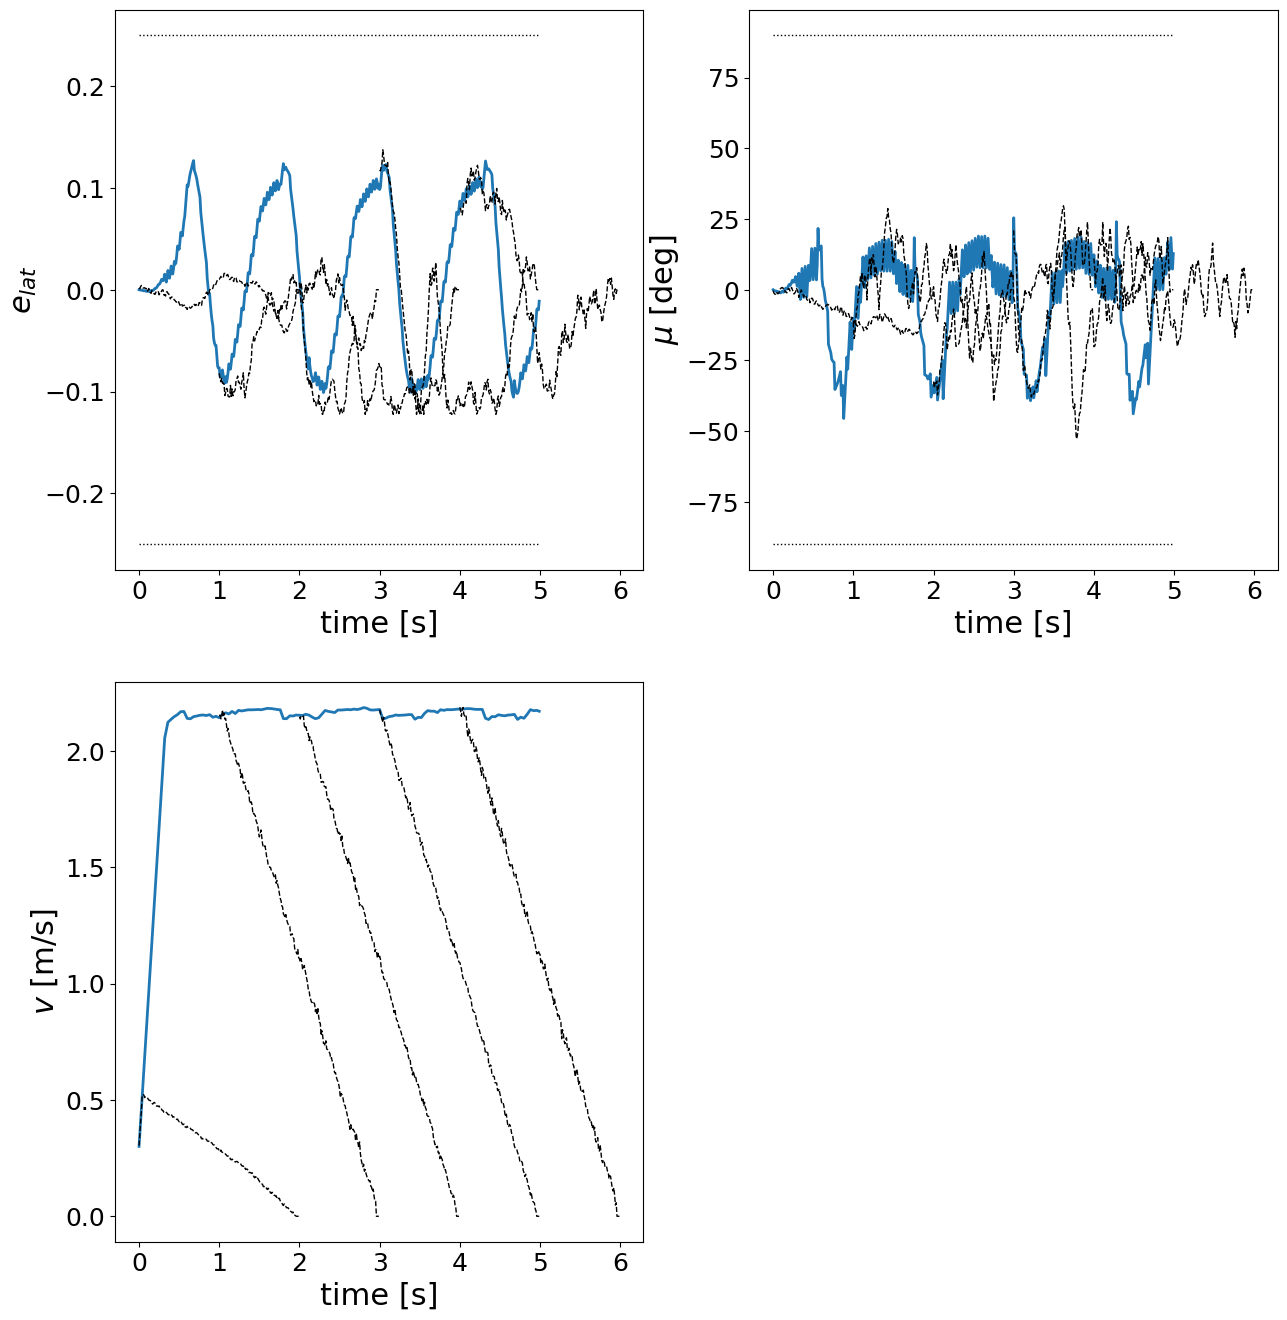

In [184]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

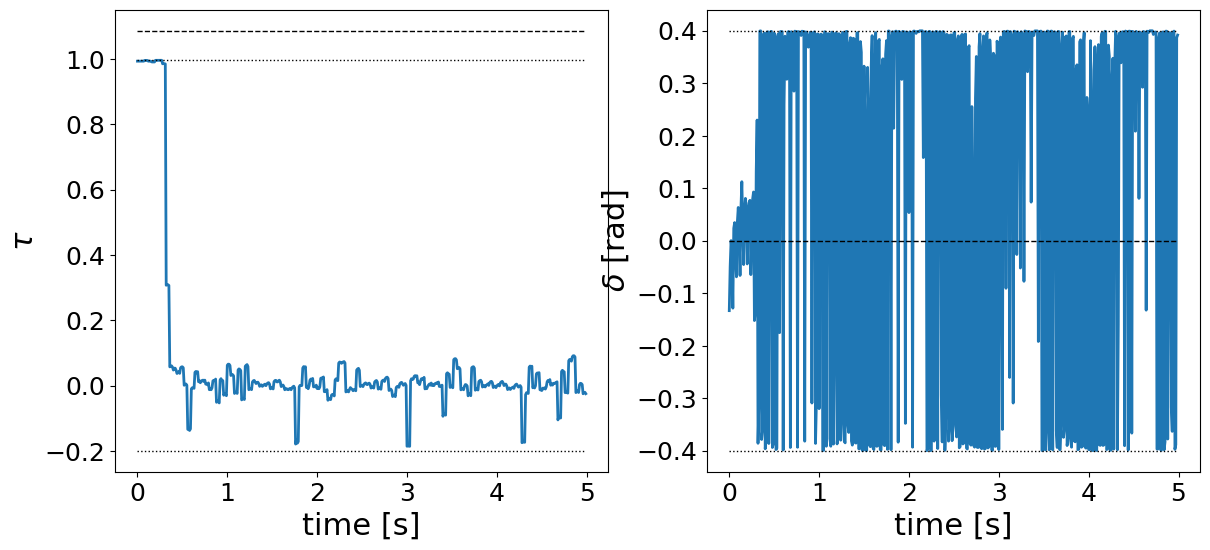

In [185]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [186]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(8.343694413159852e-08, 0.0002303520459534525)


In [187]:
sigma_max[1]/np.pi*180

0.013198200035336421

In [188]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: 'fix mu and \n add data'>: <tools.simualtion_results.Results object at 0x16bec5e20>, <SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: 'fitting steady state'>: <tools.simualtion_results.Results object at 0x17ecdb6a0>, <SafetyFilterTypes.INDIRECT_FIX_MU: 'fix mu'>: <tools.simualtion_results.Results object at 0x17e221b20>, <SafetyFilterTypes.INDIRECT_ZERO_V: 'stop at \n center line'>: <tools.simualtion_results.Results object at 0x16bb38760>, <SafetyFilterTypes.INDIRECT_STOP: 'stop anywhere \n on the track'>: <tools.simualtion_results.Results object at 0x164416ee0>}


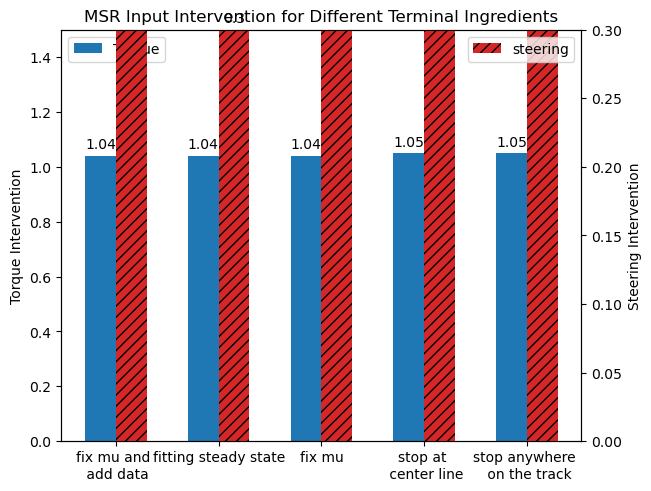

In [189]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

In [190]:
simulator.systems[0].get_noise()

matrix([[ 0.0014617 ],
        [-0.00052052],
        [ 0.00371427]])

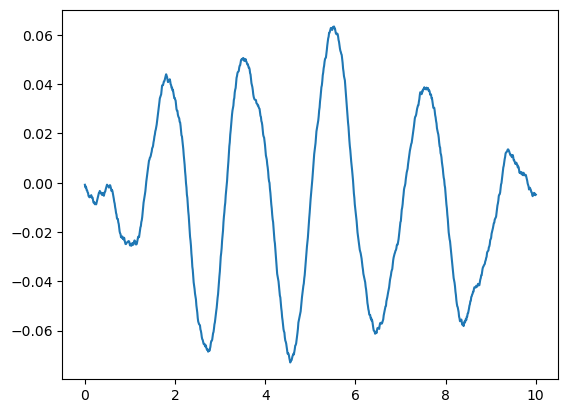

In [191]:
io_data = simulator.io_data_dict[1/0.3]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

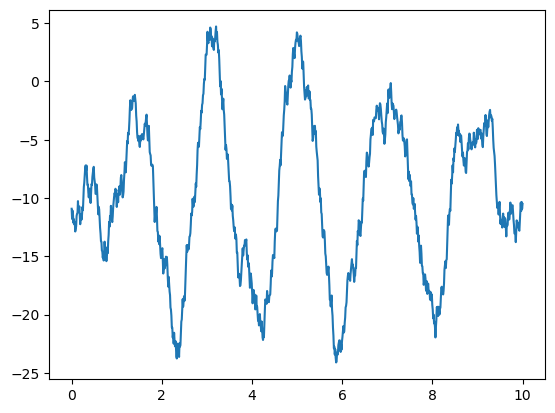

In [192]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

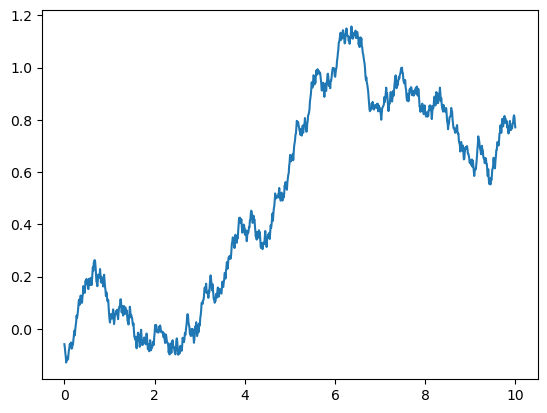

In [193]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

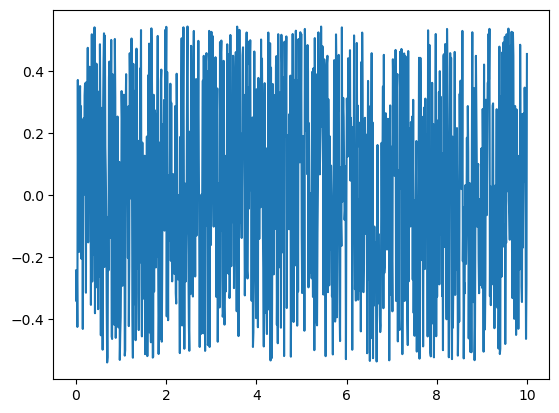

In [194]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

In [195]:
print(simulator.systems[1].get_zero_input())
print(simulator.systems[1].get_zero_state())

[0.         0.29568153]
[ 0.         -0.17421323  1.          0.        ]


In [196]:
U, S, V = np.linalg.svd(io_data.H_input)
print(S)

[119.11503963  13.8163928   13.79761111  13.57993109  13.5356796
  13.50818884  13.16095821  12.91621247  12.86071341  12.74721329
  12.72117897  12.6729911   12.45467871  12.44562101  12.38403285
  12.36830189  12.2107692   12.14879426  12.09827152  12.08500583
  11.9001449   11.89685223  11.779515    11.77190121  11.73034698
  11.70114098  11.67770586  11.56959244  11.52091933  11.50237692
  11.48058381  11.31850089  11.29393618  11.28557252  11.26902692
  11.12708143  11.10617682  11.08051429  10.98364164  10.9419495
  10.81457418  10.80940682  10.79720174  10.78258774  10.76205018
  10.72139746  10.69664452  10.54317946  10.51548565  10.48787556
  10.3859174   10.25812229  10.18059942  10.09693921  10.08960925
  10.06399007  10.06070207  10.03274239  10.02120532  10.01551667
  10.0127672    9.99381002   9.99208105   9.96448405   9.93065842
   9.90917857   9.84859218   9.83459919   9.80606318   9.78816151
   9.74234986   9.72422891   9.71594268   9.6713895    9.64601327
   9.6416702